In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('test1.csv')

In [4]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df[:3]

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [6]:
df[-4:]

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
pd.DataFrame(df.iloc[465, :])

,465
39,52
State-gov,Private
77516,35598
Bachelors,HS-grad
13,9
Never-married,Divorced
Adm-clerical,Transport-moving
Not-in-family,Unmarried
White,White
Male,Male


In [8]:
df.rename(columns={' <=50K' : "Income"}, inplace= True)
df.columns

Index(['39', ' State-gov', '77516', ' Bachelors', '13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', '2174', '0', '40',
       ' United-States', 'Income'],
      dtype='object')

In [9]:
dict(df.iloc[32465, :])['Income'] == ' >50K'

True

In [10]:
len(df.columns)

15

In [11]:
df.columns = ['age','type_employer','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital_gain','capital_loss','hr_per_week','country','income']

In [12]:
df['Srl No'] = range(df.shape[0])

In [13]:
df.shape[0]

32560

In [14]:
pd.DataFrame(df.iloc[0, :5])

,0
age,50
type_employer,Self-emp-not-inc
fnlwgt,83311
education,Bachelors
education_num,13


In [15]:
df['country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
df.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income', 'Srl No'],
      dtype='object')

In [17]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [18]:
# cond = df['sex'] == ' Male' & df['income'] == ' >=50K'

df.loc[(df['sex'] == ' Male') & (df['income'] == ' >50K'), "Srl No"]

6            6
8            8
9            9
10          10
13          13
         ...  
32531    32531
32532    32532
32538    32538
32553    32553
32556    32556
Name: Srl No, Length: 6662, dtype: int64

In [19]:
df['sex'].unique(), df['income'].unique()

(array([' Male', ' Female'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object))

In [20]:
noOfMales = dict(df['sex'].value_counts())[' Male']
noOfHighMales = df.loc[(df['sex'] == ' Male') & (df['income'] == ' >50K')].shape[0]

noOfMales, noOfHighMales

(21789, 6662)

In [21]:
percentage = (noOfHighMales/noOfMales)*100
percentage

30.57506081050071

In [22]:
df.kurt(axis= 0)

/tmp/ipykernel_2856/3996744973.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt(axis= 0)


age               -0.166212
fnlwgt             6.218940
education_num      0.623525
capital_gain     154.795024
capital_loss      20.376029
hr_per_week        2.916505
Srl No            -1.200000
dtype: float64

In [29]:
df.skew(axis= 0)

/tmp/ipykernel_2856/3587793001.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis= 0)


age               0.558738
fnlwgt            1.446972
education_num    -0.311630
capital_gain     11.953690
capital_loss      4.594549
hr_per_week       0.227636
Srl No            0.000000
dtype: float64

In [24]:
quants = dict(df.quantile([0.25, 0.5, 0.75], axis= 0)['age'])
quants

/tmp/ipykernel_2856/1321743206.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quants = dict(df.quantile([0.25, 0.5, 0.75], axis= 0)['age'])


{0.25: 28.0, 0.5: 37.0, 0.75: 48.0}

In [25]:
q1 = quants[0.25]
q2 = quants[0.5]
q3 = quants[0.75]

In [30]:
df.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income', 'Srl No'],
      dtype='object')

In [33]:
import matplotlib.pyplot as plt


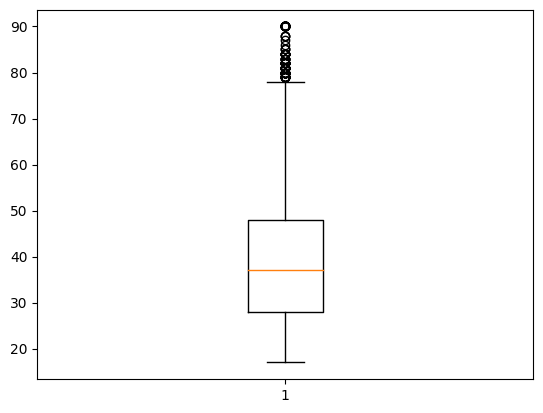

In [59]:
plt.boxplot(df[['age']])
plt.show()

In [43]:
df.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income', 'Srl No'],
      dtype='object')

In [48]:
df.loc[(df['sex'] == ' Male')]['hr_per_week'].mean(), df.loc[(df['sex'] == ' Male')]['hr_per_week'].var()

(42.428197714443066, 146.89493828365366)

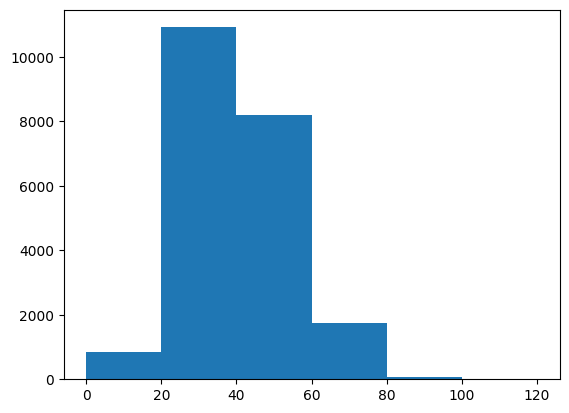

In [57]:
plt.hist(df[(df['sex'] == ' Male')]['age'], bins= range(0, 121, 20))
plt.show()

In [55]:
df['age'].skew()

0.5587376395152729